Assignment Activity 3: Analyse customer sentiments with reviews

Objective:

1. What is the general sentiment of customers across all products?
2. Based on the polarity of the sentiment, what are the top 20 positive and top 20 negative reviews?
    

In [62]:
#Prepare workstation

In [63]:
# Import libraries
import numpy as np
import pandas as pd

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Import data
df_review = pd.read_csv("game_reviews.csv")

In [65]:
# View the data
df_review.shape

(15000, 9)

In [66]:
df_review.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [67]:
# Pre-processing the data 

In [68]:
# Check for missing values and datatype 
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [69]:
# remove missing values from one column 
df_review.dropna(subset=['reviewText'], inplace=True)

In [70]:
df_review.shape

(14990, 9)

In [71]:
# check for duplicates in the entire dataset
df_review.duplicated().sum()

8

In [72]:
# verifying the columns of duplicates
df_review.loc[df_review.duplicated(keep=False), :]

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
1144,5,True,"09 25, 2016",ABWSQI9992Q29,Gary P.,nice,Five Stars,1474761600,NaN
1145,5,True,"09 25, 2016",ABWSQI9992Q29,Gary P.,nice,Five Stars,1474761600,NaN
1154,5,True,"05 11, 2016",A115TZEJ3U3AER,bebo995,On-time and nice item.,Five Stars,1462924800,NaN
1155,5,True,"05 11, 2016",A115TZEJ3U3AER,bebo995,On-time and nice item.,Five Stars,1462924800,NaN
2583,4,True,"09 08, 2014",A2534XA4DU1H4Y,Amazon Customer,All Good,Four Stars,1410134400,NaN
2584,4,True,"09 08, 2014",A2534XA4DU1H4Y,Amazon Customer,All Good,Four Stars,1410134400,NaN
10654,5,True,"07 12, 2014",ACNMHIMYEQX4Z,Joseph Vaughn,Beautifully written and bound. Full of the qui...,Five Stars,1405123200,NaN
10930,5,True,"07 12, 2014",ACNMHIMYEQX4Z,Joseph Vaughn,Beautifully written and bound. Full of the qui...,Five Stars,1405123200,NaN
12115,5,True,"01 18, 2015",A2D4OOJ0Y0T4J3,L. Scot Gowers,A+,Five Stars,1421539200,NaN
12170,5,True,"01 18, 2015",A2D4OOJ0Y0T4J3,L. Scot Gowers,A+,Five Stars,1421539200,NaN


In [73]:
# Check the number of duplicate values in the specific column
df_review.reviewText.duplicated().sum()

596

While the duplicates in the reviewText column show 596, i have choosen not to remove them from the review as common expression words such such as 'happy', 'like' from different USERS/REVIEWERS are being counted as duplicates

Assumption: While another approach would be to remove "false" under verified however the assumption here is that it the process to verify each review takes time and not always accurate hence for more robust insights especially at the stage of exploration i am not deleteing the "false"  from the verified column. 

In [76]:
# removing duplicates from the entire dataset
new_review = df_review.drop_duplicates(keep='last')

In [77]:
new_review.shape

(14982, 9)

Although the number of duplicates removed are only 8 , these duplcates were confirmed duplcates as seen above. As mentioned above removeing duplcates from the REviewText column( 596) would be removing actual reviews from reviewers and would not give an accurate reflection of the sentiment. 

In [78]:
# Transform data to lowercase
new_review['reviewText'] = new_review['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [79]:
new_review.head ()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*: your unpainted ...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy! bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9's previous screens these w...,Money trap,1486512000,NaN


In [80]:
# Remove punctuations
new_review['reviewText'] = new_review['reviewText'].str.replace('[^\w\s]', '')

In [81]:
new_review.head ()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,when it comes to a dms screen the space on the...,The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9 your unpainted mi...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN


As seen above the data been cleaned ( duplicates removed, missing values removed, punctuations removed, and words convereted to lowercase) and now is ready for analysis.

In [82]:
# Visulaise the most frequently used words with a Word CLound

In [83]:
# String all the comments together in a single variable
all_comments = ''
for i in range(new_review.shape[1]):
    all_comments = all_comments + new_review['reviewText'][i]

In [84]:
# Import along with matplotlib and seaborn for visualisation
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

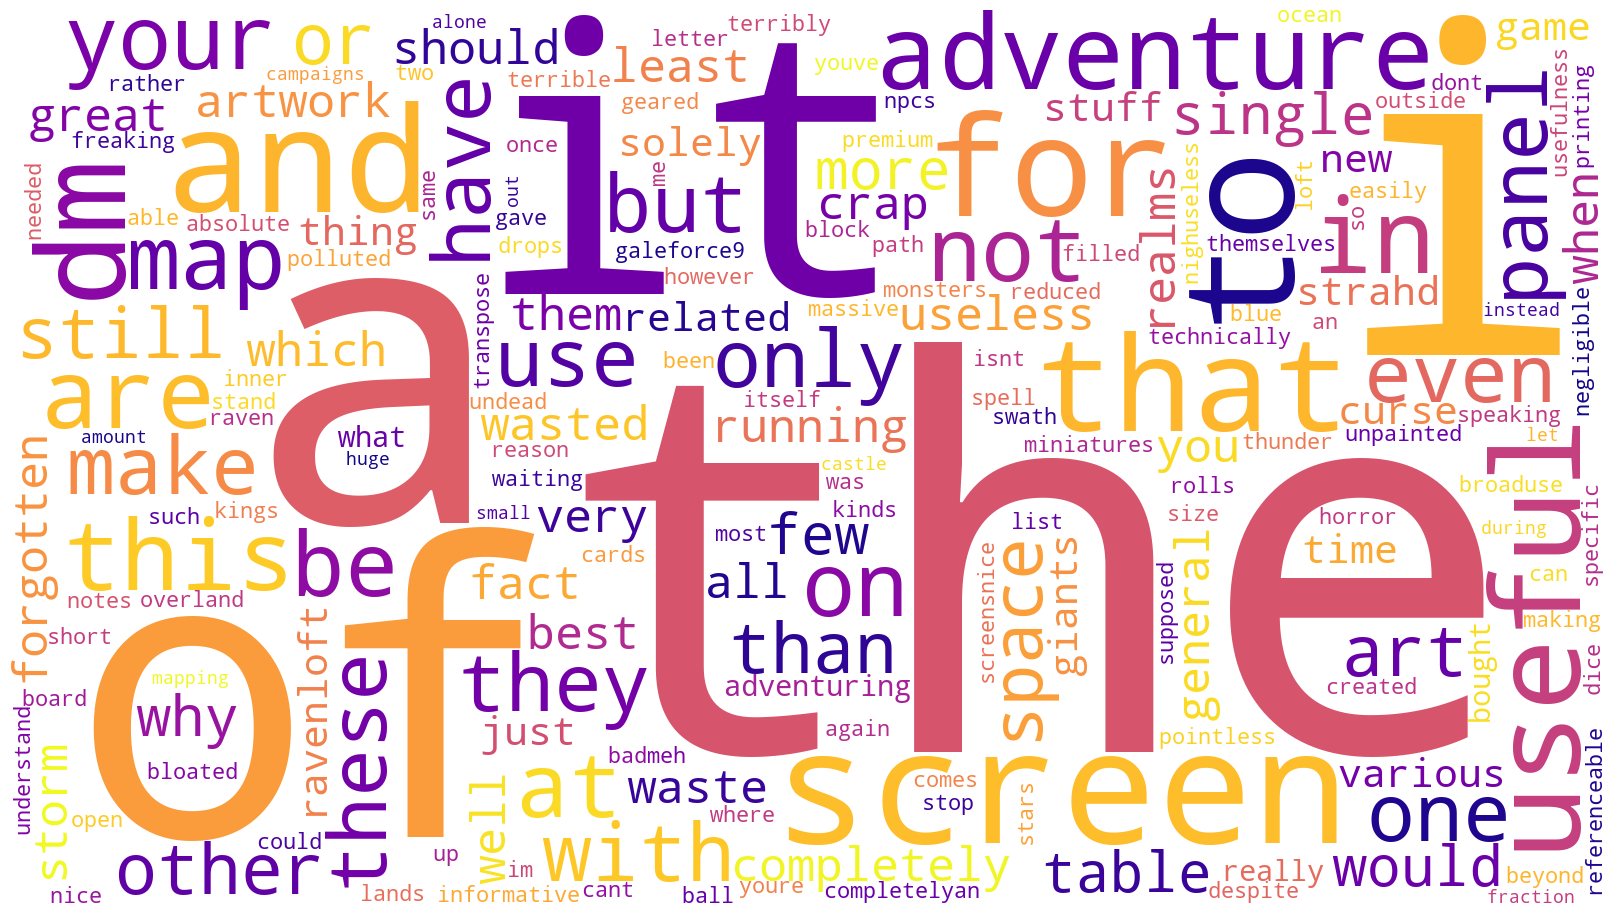

In [85]:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap ='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

As seen in the word cloud above it seems like most common words used are 'the', 'i', 'a' . These words however do not give us any indication of the sentitment of the reviewer, so we will proceed to remove these words to get a more accurate picture.

In [86]:
# Tokenisation

In [87]:
# Import nltk and download nltk's resources to assist with tokenization
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/oliya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
new_review['tokens'] = new_review['reviewText'].apply(word_tokenize)

In [89]:
new_review['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

With word tokenisation we have broken a sentence into words that will allow us to perform various analysis on them in this case counting the most often used words and further on removing stop words such as "the", "i","a".

In [90]:
# Combine all tokens into one list
all_tokens = []
for i in range(new_review.shape[1]):
    all_tokens = all_tokens + new_review['tokens'][i]

In [91]:
#  Compute the tokens with the maximum frequency
from nltk.probability import FreqDist
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 67, 'of': 29, 'to': 20, 'a': 20, 'and': 19, 'is': 17, 'it': 14, 'i': 14, 'screen': 13, 'that': 13, ...})

In [92]:
# Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

In [93]:
# Eliminate stopwords( as they seem to have the highest frequency)

In [94]:
# Download the nltk resource, import the method, and extract stopwords in the English language.
nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/oliya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
# Create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

In [96]:
tokens2

['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'single',
 'screen',
 'isnt',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'referenceable',
 'tables',
 'youve',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork

In [97]:
# Visulaise the most frequently used words without the stop words with a Word Cloud

In [98]:
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

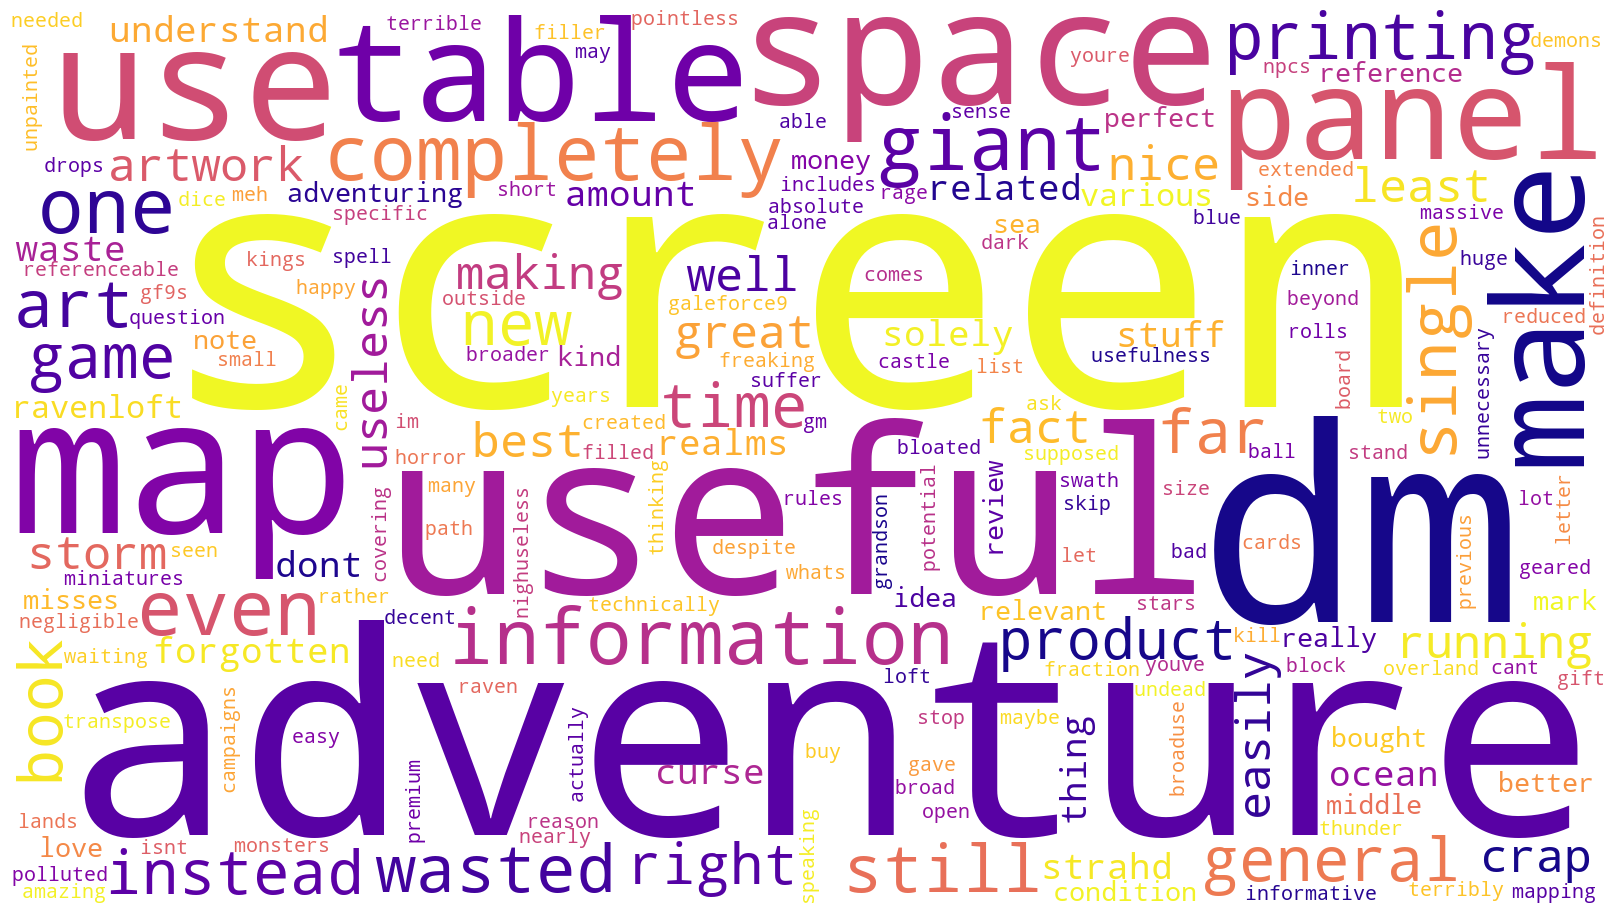

In [99]:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

As seen in the word cloud above after removing stop words (that do not necessarily help in accessing a reviewers sentiment) there are differetn set of most frequently used words such as screen, adventure , useful. 

In [100]:
# Count of the top words that appear most often

In [101]:
# View the frequency distribution
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'screen': 13, 'adventure': 11, 'useful': 9, 'map': 9, 'screens': 7, 'space': 6, 'dm': 6, 'use': 6, 'could': 6, 'dms': 5, ...})

In [102]:
# top 20 commonly used words across the comments

# Import Counter
from collections import Counter

# Generate DF out of Counter
counts = pd.DataFrame(Counter(tokens2).most_common(20),
                    columns=['Word', 'Frequency']).set_index('Word')

In [103]:
counts

,Frequency
Word,
screen,13
adventure,11
useful,9
map,9
screens,7
space,6
dm,6
use,6
could,6


In [104]:
# Generate bar graph
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Games Reviews: Count of the 20 most frequent words", fontsize=20)

# Add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

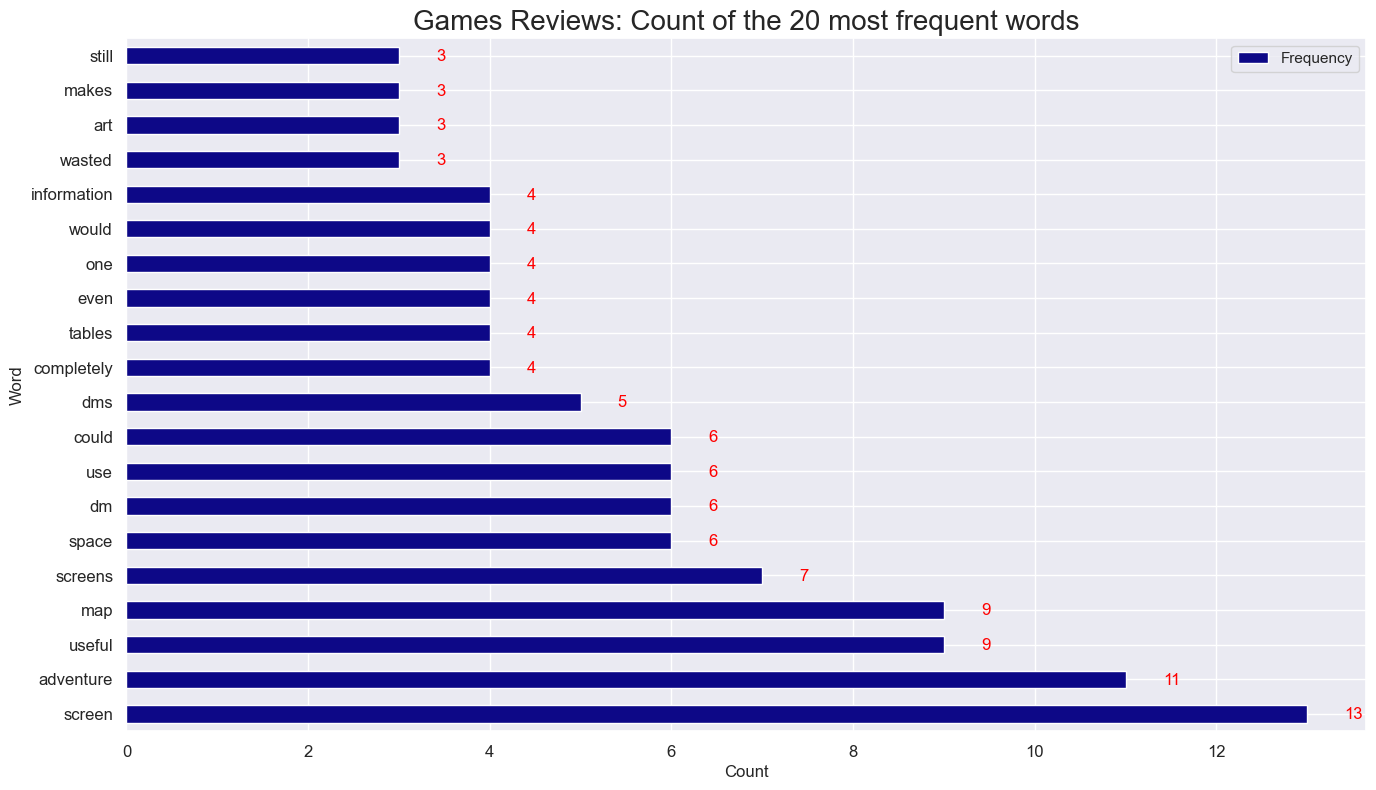

In [105]:
plt.show()

As seen in the bar graph above "screen" seems to the most commonly used word 

However it should aslo be observed that "screens" is the 5th most commonly used word. It can be assumed that they mean the same and screen/screens have in total 20 mentions,and further analysis of the meaning with respect to the product offering can be looked into.

The above analysis thus far has only allowed us to determine the most commonly used/mentioned words they do not neccessarily give us an understanding to the opinion expressed in the text. Sentiment polarity will help us quantify the sentiment on a scale from -1 to 1. The number closer to one would mean a positive sentiment.

In [106]:
#Extract Sentiment Polartiy from the reviews

In [107]:
# Import
from textblob import TextBlob

In [108]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
new_review['polarity'] = new_review['reviewText'].apply(generate_polarity)



In [109]:
# [3] Preview the result.
new_review['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [110]:
# Visualise the polarity sentiment in a histogram

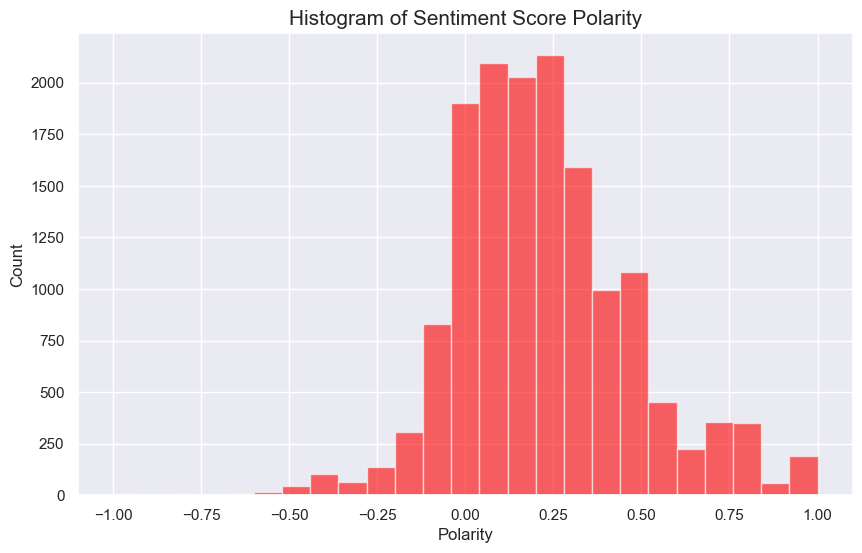

In [128]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(10,6))

# Define the bars.
n, bins, patches = plt.hist(new_review['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Sentiment Score Polarity', fontsize=15)

plt.show()

As the histogram shows us most comments sit closest to the positive sentiment.

In [112]:
# Extract subjectivity from the reviews

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
new_review['subjectivity'] = new_review['reviewText'].apply(generate_subjectivity)


In [113]:
# Preview the result.
new_review['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

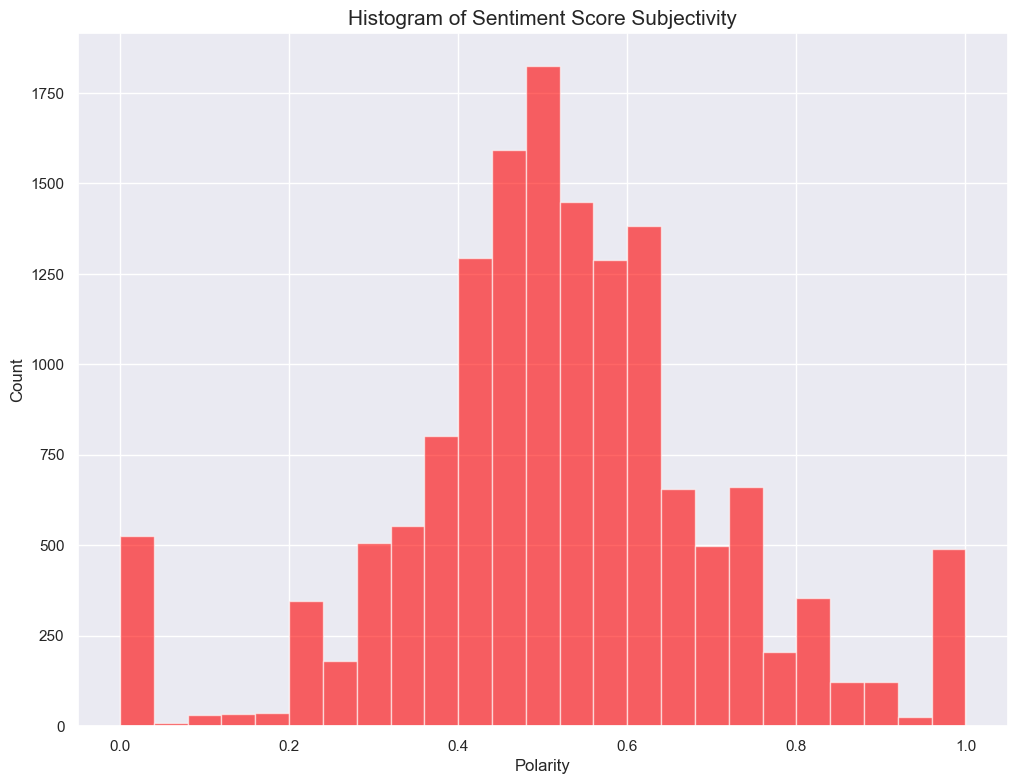

In [114]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(12,9))

# Define the bars.
n, bins, patches = plt.hist(new_review['subjectivity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Sentiment Score Subjectivity', fontsize=15)

plt.show()

The sentiment Subjectivity ranges from 0 to 1, where 0 means fact-based and objective while 1 means opinion-based and subjective

As seen in the histogram the reviews seem to sit closer be opinion based and subjective. 

In [115]:
# View the top most positive reviews

In [116]:
# [1] Create a DataFrame.
positive_sentiment = new_review.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewerName','reviewText', 'polarity', 'subjectivity']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewerName,reviewText,polarity,subjectivity
7,anon9df0,came in perfect condition,1.000000,1.000000
165,Monique K.,awesome book,1.000000,1.000000
194,Honest purchaser,awesome gift,1.000000,1.000000
496,MIZZKITTY49,excellent activity for teaching selfmanagement skills,1.000000,1.000000
524,L. G. Berkowitz,perfect just what i ordered,1.000000,1.000000
591,Former Employee,wonderful product,1.000000,1.000000
609,Pam Walley,delightful product,1.000000,1.000000
621,rbaker,wonderful for my grandson to learn the resurrection story,1.000000,1.000000
790,Kate,perfect,1.000000,1.000000
933,LUDWIG,awesome,1.000000,1.000000


As seen in the data frame above all the posistive reviews with a polarity score of 1 meaning they are feel positively about the product.

In [117]:
# View the top most negative reviews

In [118]:
# Create a DataFrame.
negative_sentiment = new_review.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewerName','reviewText','polarity','subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewerName,reviewText,polarity,subjectivity
208,carole jordan,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
2043,Barbara G. Staggs,kids did not like it thought it was boring,-1.000000,1.000000
3359,Rbysue92,some of the suggestions are disgusting,-1.000000,1.000000
8319,David San Julian,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,-1.000000,1.000000
7988,Sharon,was the elf on the shelf but it didnt have the dvd i was very disappointed,-0.975000,0.975000
9511,Amazon Customer,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,-0.975000,0.975000
8758,Amazon Customer,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,-0.866667,0.933333
13181,CriticizeK,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,-0.800000,0.900000
9143,T. Gage,cliche and stupid i should not drink and amazon,-0.800000,1.000000
9260,JGR,just stupid,-0.800000,1.000000


As seen in the above dataframe the review sentiment is negative closer to -1.

Generate a document-term matrix using bag of words for positive reviews

In [135]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(positive_sentiment['reviewText'])

In [136]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:20]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 21)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
awesome           0      1      1      0      0      0      0      0      0   
perfect           1      0      0      0      1      0      0      0      1   
best              0      0      0      0      0      0      0      0      0   
wonderful         0      0      0      0      0      1      0      1      0   
set               0      0      0      0      0      0      0      0      0   
just              0      0      0      0      1      0      0      0      0   
product           0      0      0      0      0      1      1      0      0   
play              0      0      0      0      0      0      0      0      0   
played            0      0      0      0      0      0      0      0      0   
resurrection      0      0      0      0      0      0      0      1      0   

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  Doc 16  Doc 17  \
awesome            1       1       1       0      

Here with the document term matrix using bag of words the most common words used in the top 20 postive reviews with their occurances are showing.

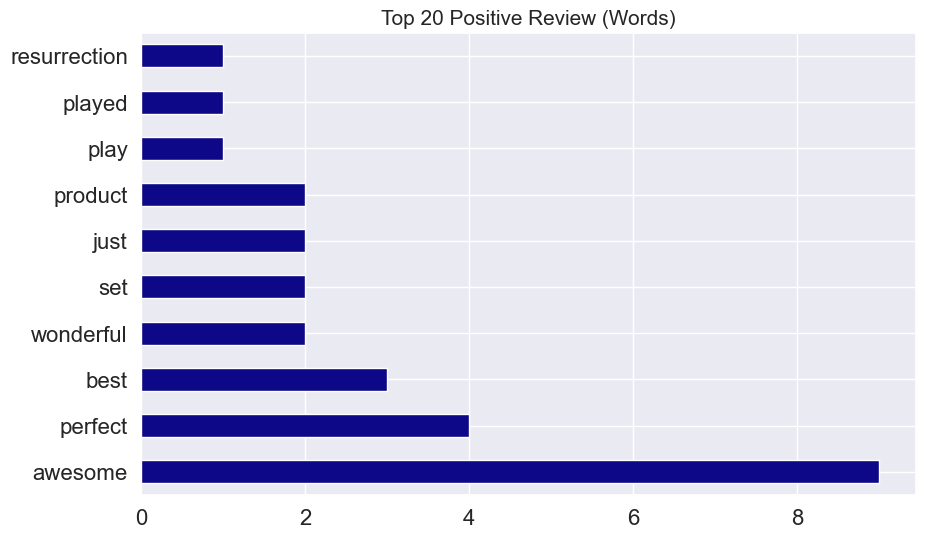

In [137]:
# plot the top 20 poistive reviews
document_term_matrix['total_count'].plot.barh(figsize=(10, 6), fontsize=16, colormap ='plasma')
plt.title('Top 20 Positive Review (Words)', fontsize=15)
plt.show()

As shown here awesome is the most commonly used word to show a positive sentiment towards a product

In [ ]:
Generate a document-term matrix using bag of words for negative reviews

In [123]:
# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(negative_sentiment['reviewText'])

In [124]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:20]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 21)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
like              0      1      0      0      0      0      0      1      0   
boring            1      1      0      0      0      0      0      0      0   
disappointed      0      0      0      0      1      1      0      0      0   
hate              0      0      0      0      0      0      2      1      0   
box               0      0      0      0      0      1      0      0      0   
elf               0      0      0      1      1      0      1      0      0   
book              0      0      0      2      0      0      0      0      0   
did               1      1      0      1      0      0      0      0      0   
stupid            0      0      0      0      0      0      0      0      1   
game              0      0      0      0      0      0      0      0      0   

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  Doc 16  Doc 17  \
like               0       0       1       0      

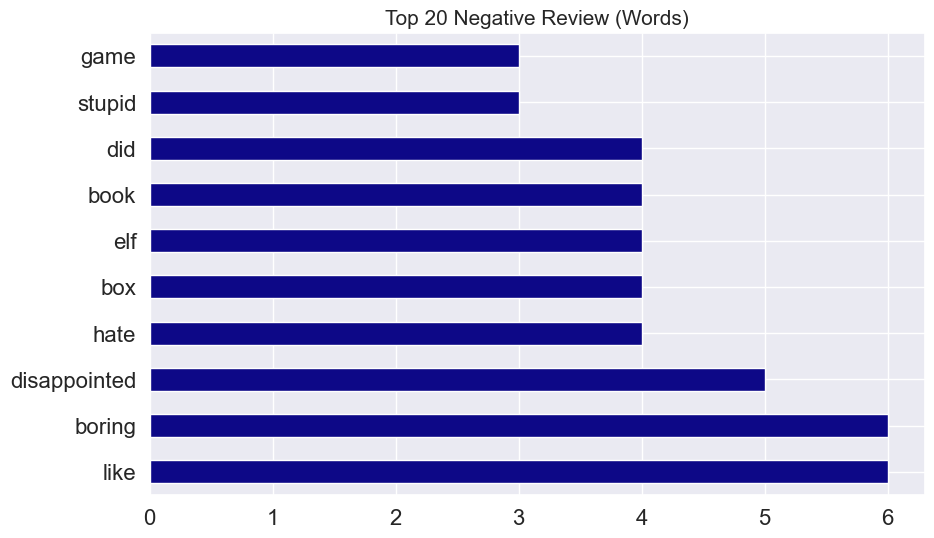

In [131]:
document_term_matrix['total_count'].plot.barh(figsize=(10, 6), fontsize=16, colormap ='plasma')
plt.title('Top 20 Negative Review (Words)', fontsize=15)
plt.show()

In [ ]:
As shown here boring is the second most commonly used word to show a negative sentiment towards a product